# 7 - application of unsupervised learning

Problem Description
Dataset:
We are using the dataset "Heart Disease patients"
From https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients/data

The following details are from the Kaggle dataset description, and this notebook 
https://www.kaggle.com/code/helenakolbanova/hierarchical-and-kmeans-multiple-dist-metrics :
"
## About the Dataset

We are going to cluster anonymized data of patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors could benefit from learning about the treatment outcomes of patients like those they are treating. The data we are analyzing comes from the V.A. Medical Center in Long Beach, CA.

## Content

The dataset includes the following features:

- **age**: Age of patient
- **sex**: Gender of patient
- **cp**: Chest pain type
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment

"

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [30]:
# Load the data
data_path = "../data/Unsupervised_learning_datasets_ex7/heart_disease_patients.csv"
data = pd.read_csv(data_path)

# Print the size of the data and the number of missing values
print("Original data shape:", data.shape)
data = data.dropna()
print("Data shape after dropping missing values:", data.shape)

Original data shape: (303, 12)
Data shape after dropping missing values: (303, 12)


In [31]:
# Print the features of the data
print(data.dtypes)

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
dtype: object


Features are all numerical type. We do not need any feature ingeneering the categorical one. We just need some simple preprocessing.

In [32]:
# Drop the 'id' column as it is not needed for clustering
data = data.drop(columns=['id'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

Let's try our first clustering, using KMeans with a number of clusters set arbitrarly to 3.

In [33]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


To evaluate our model, we are using the silhouette score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

We also plot the pairplot for each cluster.

Silhouette Score for initial data: 0.13465085312519884


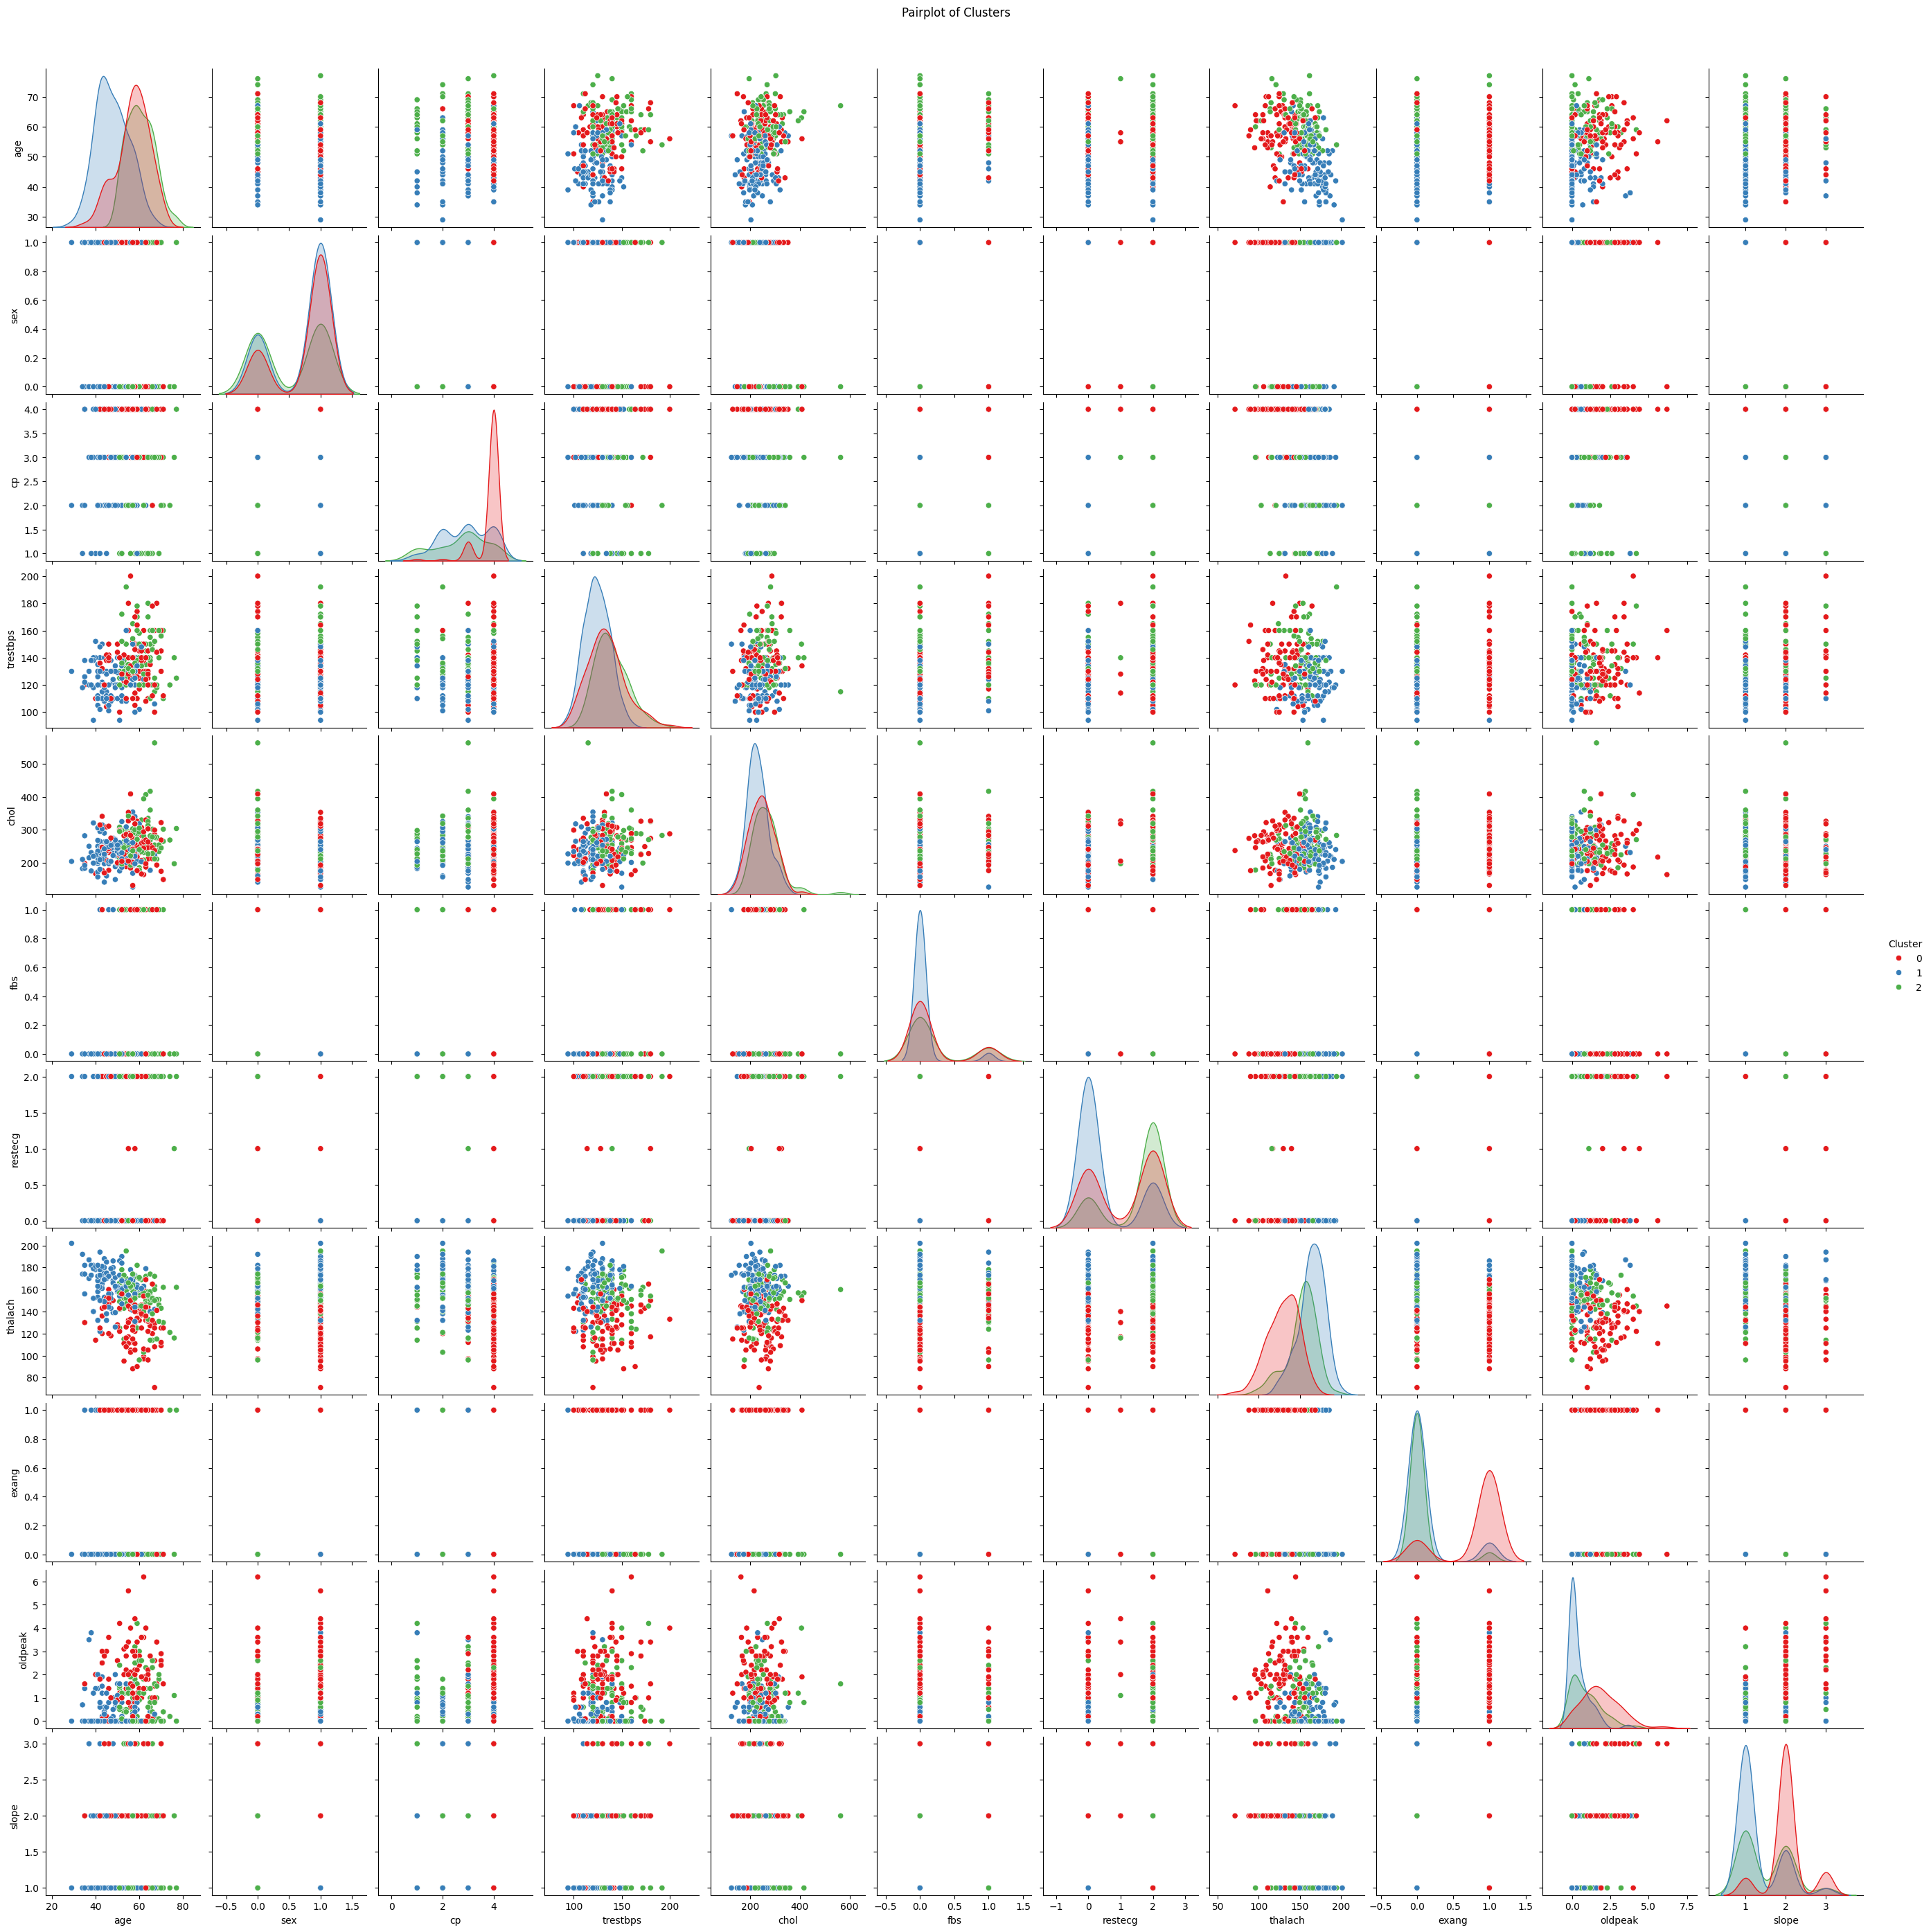

In [34]:

# Calculate silhouette score for the original data
silhouette_avg = silhouette_score(X_scaled, KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled))
print("Silhouette Score for initial data:", silhouette_avg)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Plot the clusters
sns.pairplot(data, hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Clusters', y=1.02)
plt.show()

As there are too much features, it is hard to see clearly what is going on.
Furthermore, we do not see any distinct case where the three clusters are helpfull.
Except for some cases such as age/thalach, trestbps/thalach etc.

We will now see the clusters made by KMeans in details.


In [ ]:
# Print clusters sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(f"Cluster sizes: {cluster_sizes}, their sum is {np.sum(list(cluster_sizes.values()))}")
print(f"The original data size is {data.shape[0]}")

Mean Silhouette Score: 0.13465085312519884


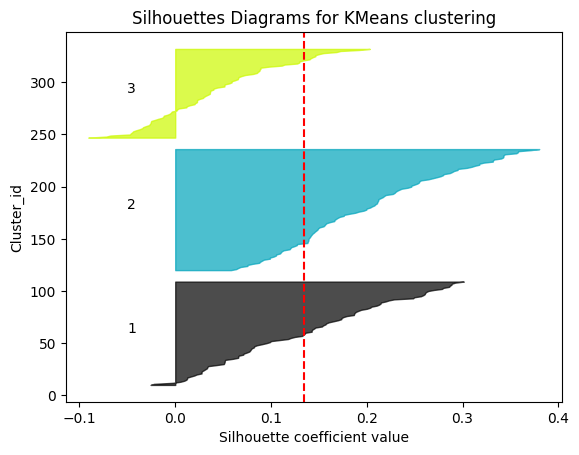

Mean Silhouette Score: 0.13


In [44]:
# Mean silhouette score for each cluster
sample_silhouette_values = silhouette_samples(X_scaled, clusters)
print("Mean Silhouette Score:", silhouette_avg)

# Visualisation des silhouettes
fig, ax = plt.subplots()
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    y_lower = y_upper + 10
ax.set_title("Silhouettes Diagrams for KMeans clustering")
ax.set_xlabel("Silhouette coefficient value")
ax.set_ylabel("Cluster_id")
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.show()

print("Mean Silhouette Score:", silhouette_avg.round(2))

The result of mean silhouette of 0.13 is not good.
Actually, this score varies between -1 and 1 and according to this discussion : https://www.researchgate.net/post/Threshold_silhouette_score_for_cluster_analysis#:~:text=Typically%2C%20a%20silhouette%20score%20of,assigned%20to%20the%20wrong%20cluster.
"a silhouette score of 0.5 or higher is considered to indicate a reasonably good clustering"


The initial KMeans had nb_clusters = 3.
It is perhaps too low.
So let's try to increase the number of clusters and see if the silhouette score increases or not.


Silhouette score for 2 clusters: 0.1724141819802903
Silhouette score for 7 clusters: 0.12811847436306634
Silhouette score for 12 clusters: 0.1171963542790926
Silhouette score for 17 clusters: 0.12826966805282955
Silhouette score for 22 clusters: 0.13852312017647944
Silhouette score for 27 clusters: 0.14041777426194602
Silhouette score for 32 clusters: 0.14529896429688682
Silhouette score for 37 clusters: 0.1497365817158694
Silhouette score for 42 clusters: 0.13775330916098177
Silhouette score for 47 clusters: 0.1349060283134194
Silhouette score for 52 clusters: 0.14940260660434498
Silhouette score for 57 clusters: 0.15298240323055418
Silhouette score for 62 clusters: 0.15395467638481444
Silhouette score for 67 clusters: 0.16203116328268777
Silhouette score for 72 clusters: 0.16610205932556607
Silhouette score for 77 clusters: 0.16435753912763093
Silhouette score for 82 clusters: 0.16275634992917506
Silhouette score for 87 clusters: 0.1584714719456798
Silhouette score for 92 clusters: 0

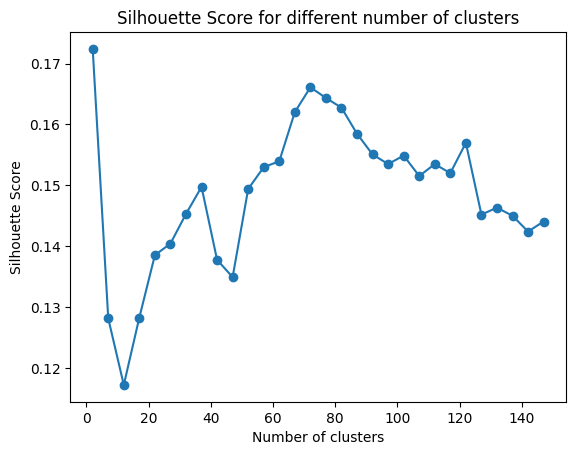

In [46]:
# Plotting the silhouette scores for different numbers of clusters
range_n_clusters = [i for i in range(2, 150, 5)]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    print(f"Silhouette score for {num_clusters} clusters: {silhouette_score(X_scaled, cluster_labels)}")
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()

Using KMeans method, the silhouette score does not scale up with the number of clusters.
Let's try a different approach, changing the algorithm hyperparameter of KMeans method.

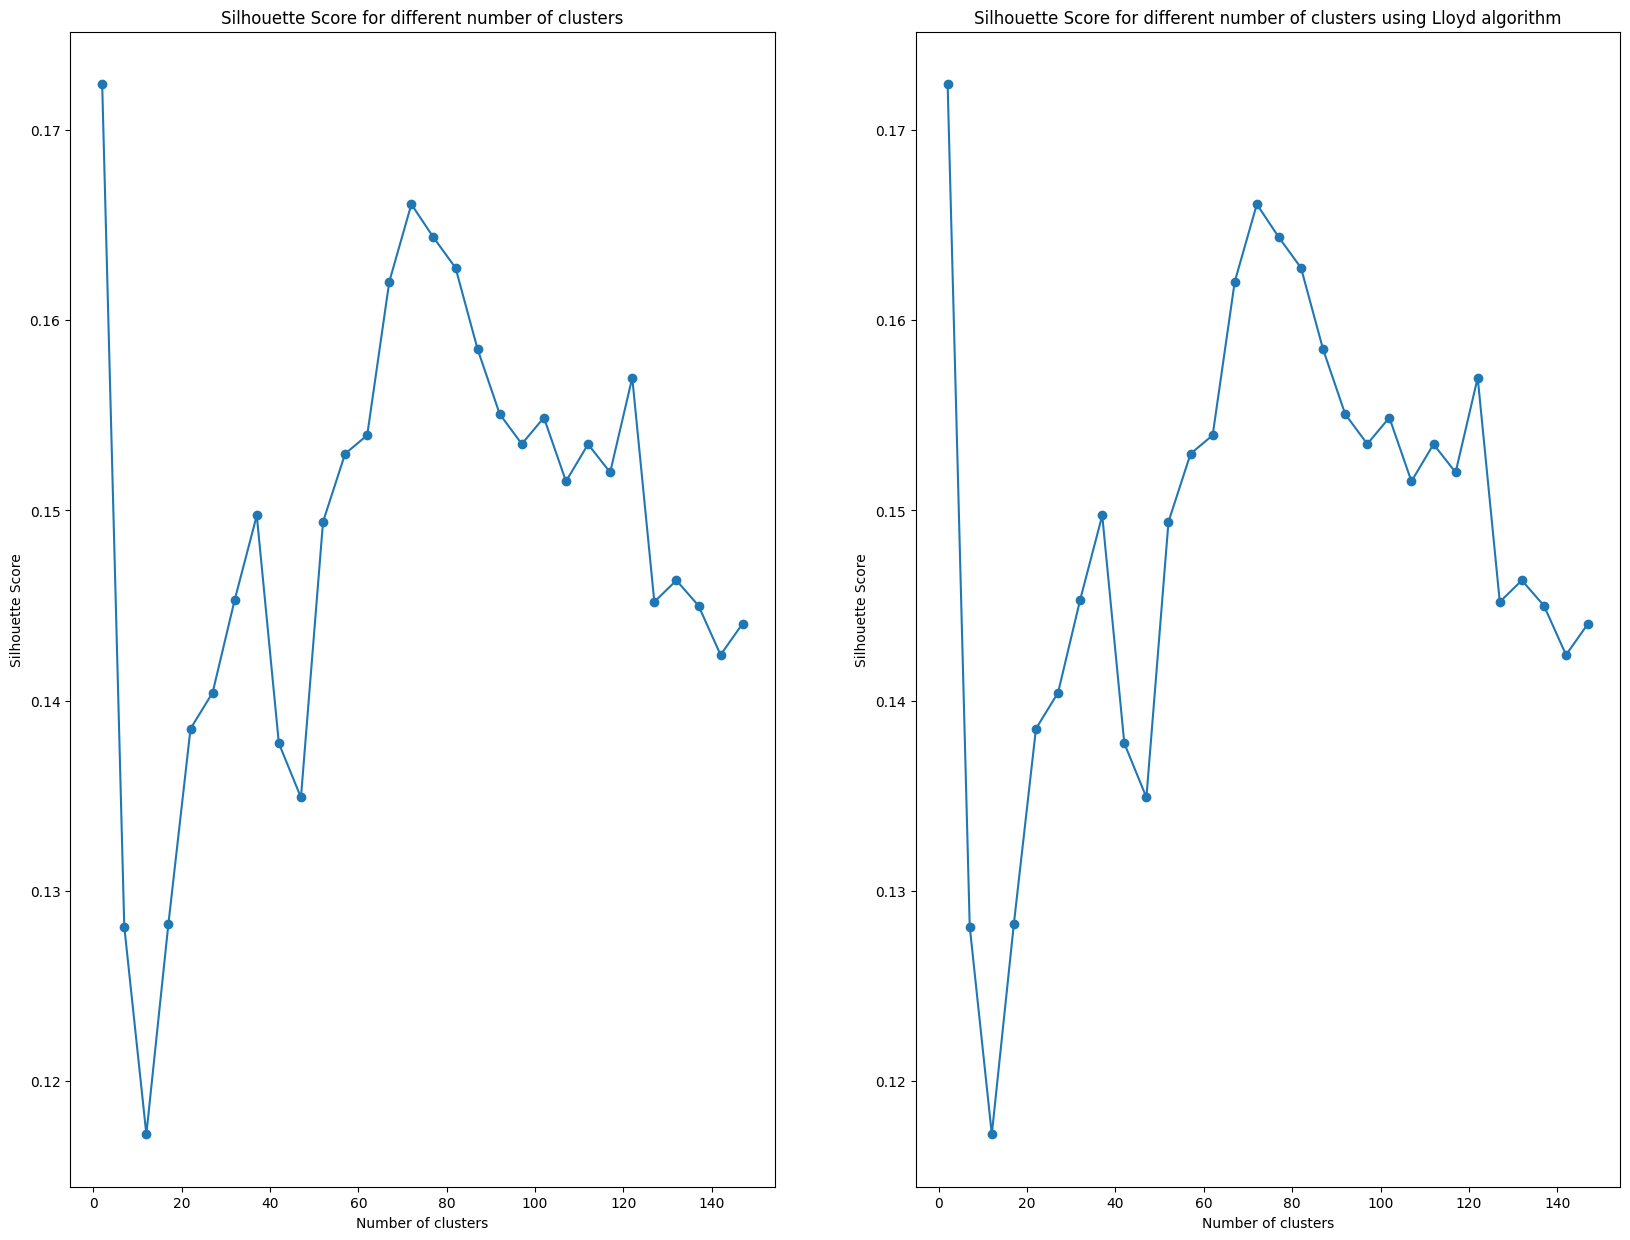

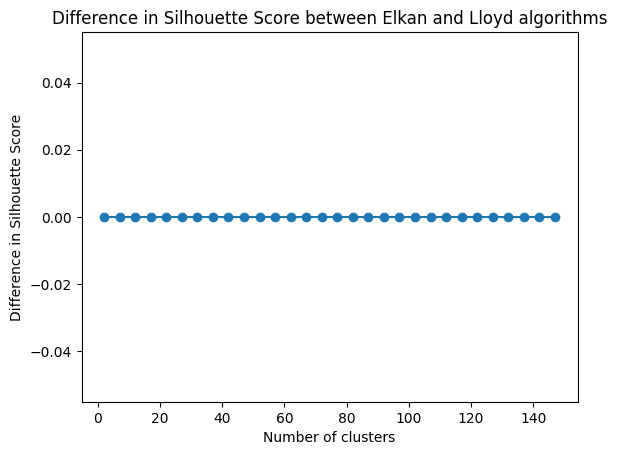

In [51]:
# Plotting the silhouette scores for different numbers of clusters
range_n_clusters = [i for i in range(2, 150, 5)]
lloyd_silhouette_avg = []
elkan_silhouette_avg = []

for num_clusters in range_n_clusters:
    # Using KMeans with default=lloyd algorithm
    lloyd_kmeans = KMeans(n_clusters=num_clusters, random_state=42, algorithm="lloyd")
    lloyd_kmeans.fit(X_scaled)
    lloyd_cluster_labels = lloyd_kmeans.labels_
    lloyd_silhouette_avg.append(silhouette_score(X_scaled, lloyd_cluster_labels))

    # Using KMeans with elkan algorithm
    elkan_kmeans = KMeans(n_clusters=num_clusters, random_state=42, algorithm="elkan")
    elkan_kmeans.fit(X_scaled)
    elkan_cluster_labels = elkan_kmeans.labels_
    elkan_silhouette_avg.append(silhouette_score(X_scaled, elkan_cluster_labels))

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, lloyd_silhouette_avg, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters using Lloyd algorithm')

plt.show()

# Check the differences between elkan_silhouette_avg and lloyd_silhouette_avg
diff = [elkan_silhouette_avg[i] - lloyd_silhouette_avg[i] for i in range(len(elkan_silhouette_avg))]
plt.plot(range_n_clusters, diff, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Difference in Silhouette Score')
plt.title('Difference in Silhouette Score between Elkan and Lloyd algorithms')
plt.show()

Silhouette Score for KMeans (default): 0.13465085312519884
Silhouette Score for KMeans (elkan): 0.13465085312519884
Silhouette Score for Agglomerative Clustering: 0.10117206829066541
DBSCAN did not find enough clusters for a valid silhouette score.
Silhouette Score for Gaussian Mixture Models: 0.13692133824104552
Silhouette Score for KMeans after PCA: 0.397555560826798


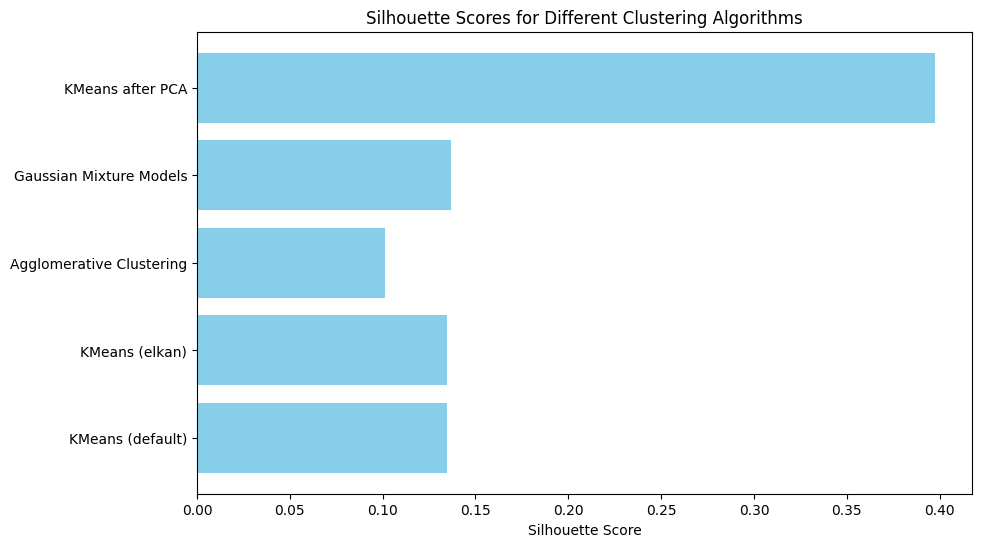

In [38]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# List to store silhouette scores
silhouette_scores = []

# Function to evaluate and store silhouette scores
def evaluate_clustering(clustering_model, X, description):
    clusters = clustering_model.fit_predict(X)
    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(X, clusters)
        print(f"Silhouette Score for {description}: {silhouette_avg}")
        silhouette_scores.append((description, silhouette_avg))
    else:
        print(f"{description} did not find enough clusters for a valid silhouette score.")

# Apply various clustering algorithms
evaluate_clustering(KMeans(n_clusters=3, random_state=42), X_scaled, "KMeans (default)")
evaluate_clustering(KMeans(n_clusters=3, random_state=42, algorithm='elkan'), X_scaled, "KMeans (elkan)")
evaluate_clustering(AgglomerativeClustering(n_clusters=3), X_scaled, "Agglomerative Clustering")
evaluate_clustering(DBSCAN(eps=0.5, min_samples=5), X_scaled, "DBSCAN")
evaluate_clustering(GaussianMixture(n_components=3, random_state=42), X_scaled, "Gaussian Mixture Models")
evaluate_clustering(KMeans(n_clusters=3, random_state=42), X_pca, "KMeans after PCA")

# Plot silhouette scores for comparison
descriptions, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.barh(descriptions, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Algorithms')
plt.show()


The PCA high results in clustering results improvement could come from eliminating noise and redundant features.